In [47]:
from importlib import reload
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import d_fuzzstream
from datetime import datetime

In [48]:
data = pd.read_csv('https://raw.githubusercontent.com/vpozdnyakov/DS_Datasets/master/Synthetic/Non-Stationary/Bench1_11k/Benchmark1_11000.csv')
data.head()

,X1,X2,class
0,0.118788,0.890228,1.0
1,0.107214,0.102574,2.0
2,0.088860,0.899348,1.0
3,0.077085,0.089380,2.0
4,0.113830,0.885728,1.0


In [50]:
n = 100
datastream = data.iloc[:n]
datastream = datastream.rename(columns={'class': 'target'})
datastream = datastream.rename(columns={'X1': 'x', 'X2': 'y'})
datastream['last'] = pd.Series([False] * n)
datastream.iloc[[-1], [-1]] = True
datastream = datastream.fillna(3)

In [51]:
def plot(fig, ax):
    for i_fc in sum_s.to_dataframe().itertuples():
        fill = True if i_fc.N == 1 else False
        alpha = 0.05 if i_fc.N == 1 else 1    
        circle = plt.Circle((i_fc.x, i_fc.y), 
                            i_fc.radius, 
                            color='b', 
                            fill=fill, 
                            alpha=alpha)
        ax.add_artist(circle)
    sns_fig = sns.scatterplot(
        x="x",
        y="y",
        hue="target",
        style='last',
        data=datastream.iloc[:i_example], 
        legend=False, 
        palette="Set1").get_figure()
    #plt.show()

In [52]:
res = {'purity': [], 
       'creations': [], 
       'removals': [], 
       'merges': [], 
       'absorptions': [], 
       'seconds': []}

reload(d_fuzzstream)
sum_s = d_fuzzstream.SummaryStructure(threshold=1, max_fmics=200)
i_example = 0

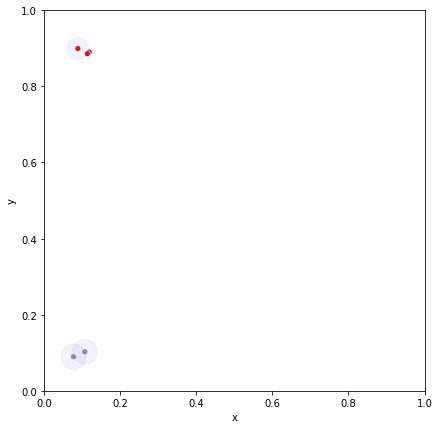

In [57]:
#s = datetime.now()
sum_s.clustering(datastream.iloc[[i_example]], test=True)
i_example += 1
fig, ax = plt.subplots(figsize=(7,7))
ax.set_aspect(1)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
plot(fig, ax)
#f = datetime.now()

In [58]:
sum_s.to_dataframe()

,x,y,radius,N,M,SSD,CF
0,0.107214,0.102574,0.032891,1,1,0,"(0.10721358009086099, 0.102573647311236)"
1,0.113830,0.885728,0.006696,1,1,0,"(0.11382952254193698, 0.8857283205009859)"
2,0.088860,0.899348,0.028442,1,1,0,"(0.0888600189350185, 0.89934763053572)"
3,0.077085,0.089380,0.032891,1,1,0,"(0.0770850739587154, 0.0893800517459016)"
4,0.118788,0.890228,0.006696,1,1,0,"(0.118787832160171, 0.890227983508078)"


res['purity'].append(sum_s.purity)
res['creations'].append(sum_s.creations)
res['removals'].append(sum_s.removals)
res['merges'].append(sum_s.merges)
res['absorptions'].append(sum_s.absorptions)
res['seconds'].append((f - s).seconds)
pd.DataFrame(res)